## Auteurs:
### Théo Dionne
### Jérôme Leblanc

In [1]:
%matplotlib inline

# Importations nécessaires
import numpy as np
import scipy.sparse as sp
from scipy.sparse.linalg import eigs
import matplotlib.pyplot as plt

# Augmenter la résolution de la figure
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 200

On définit les paramètre du problèmes.

In [2]:
L = 1.0  # largeur du domaine
nv = 6  # nombre de valeurs/vecteurs propres
a = 0.01  # pas de la grille# (0.01)
Omega2 = 0.001  # \Omega^2
Gamma2 = 1.  # \Gamma^2
mu = 4 # Facteur multiplicatif de la masse de la deuxième moitié de la chaîne

Normalement, on à les équations suivantes pour des billes de masse constante:
$$
\begin{aligned}
\ddot u_1 &= -\Omega^2 u_1 + \Gamma^2 (u_2-u_1) \\
\ddot u_2 &= -\Omega^2 u_2 + \Gamma^2 (u_3-2u_2+u_1) \\
\ddot u_3 &= -\Omega^2 u_3 + \Gamma^2 (u_4-2u_3+u_2) \\
\cdots &  \\
\ddot u_{N-1} &= -\Omega^2 u_{N-1} + \Gamma^2 (u_N-2u_{N-1}+u_{N-2}) \\
\ddot u_N &= -\Omega^2 u_N + \Gamma^2 (-u_N+u_{N-1})
\end{aligned}
$$

Si la séparation des billes de masse $m$ et $\mu m$ est entre les billes $j$ et $j+1$, alors on a:
$$
\begin{aligned}
...\\
\ddot u_j &= -\Omega^2 u_j + \Gamma^2 (\mu u_{j+1}-2u_j+u_{j-1}) \\
\ddot u_{j+1} &= \frac{1}{\mu}(-\Omega^2 u_{j+1} + \Gamma^2 (u_{j+2}-2u_{j+1}+u_{j}))\\
...
\end{aligned} 
$$
Il faut donc modifier les coefficients inférieurs à la $j^e$ ligne par un facteur $\mu^{-1}$ dans la matrice $H$. 

Ici on crée une méthode qui crée les graphiques demandés selon les paramètres précedement précisés. Ceci facilite la production de graphiques avec et sans les conditions de Dirichelet.

In [3]:
def modes(Dirichlet=False):
    x = np.arange(0, L+a/2, a) # création d'une grille pour l'affichage
    dim = len(x)-2 # dimension intérieure de la matrice

    # Initialisation des trois diagonales
    D = np.full(dim, 2.0*Gamma2 + Omega2)
    D_plus = np.full(dim-1,-Gamma2)
    D_moins = np.full(dim-1,-Gamma2)
    
    # On modifie les coefficients selon mu
    # Définition du 'point milieu' de la diagonale
    #pos = (dim)//2 + (dim)%2
    pos = len(x)//2-1
    D[pos+1:] = D[pos+1:]/mu
    D_plus[pos+1:] = D_plus[pos+1:]/mu
    D_moins[pos:] = D_moins[pos:]/mu

    # Permet de rajouter les éléments nécessaires dans la matrice si Dirichlet n'est pas utilisé
    if Dirichlet == False:
        plt.title("Sans Dirichlet")
        D = np.insert(D, [0, len(D)], [1, 1/mu])    
        D_plus = np.insert(D_plus, [0, len(D_plus)], [-1, -1/mu])
        D_moins = np.insert(D_moins, [0, len(D_moins)], [-1, -1/mu])
    else:
        plt.title("Avec Dirichlet")
    
    #Création de la matrice creuse
    H = sp.diags([D, D_plus, D_moins], [0,1,-1])
    
    # Trouver les vecteurs propres de la matrice
    eigval, psi = eigs(H, nv, which='SM')

    # afficher les 'nv' premiers modes propres
    offset = 0.5
    for j in range(nv):

        # préparer les ordonnées 
        if Dirichlet == False:
            yp = np.real(psi[:,j]) 
        else:
            yp = np.real(np.concatenate([[0],psi[:,j],[0]])) # imposition de psi=0 aux frontières (Dirichlet)

        plt.plot(x, yp+j*offset, '-', markersize=2, label = 'n={0}'.format(j))
        plt.axhline(j*offset, dashes=[4, 4], lw=0.5)

    plt.xlim(0, L)
    plt.show()

On effectue maintenant les graphiques

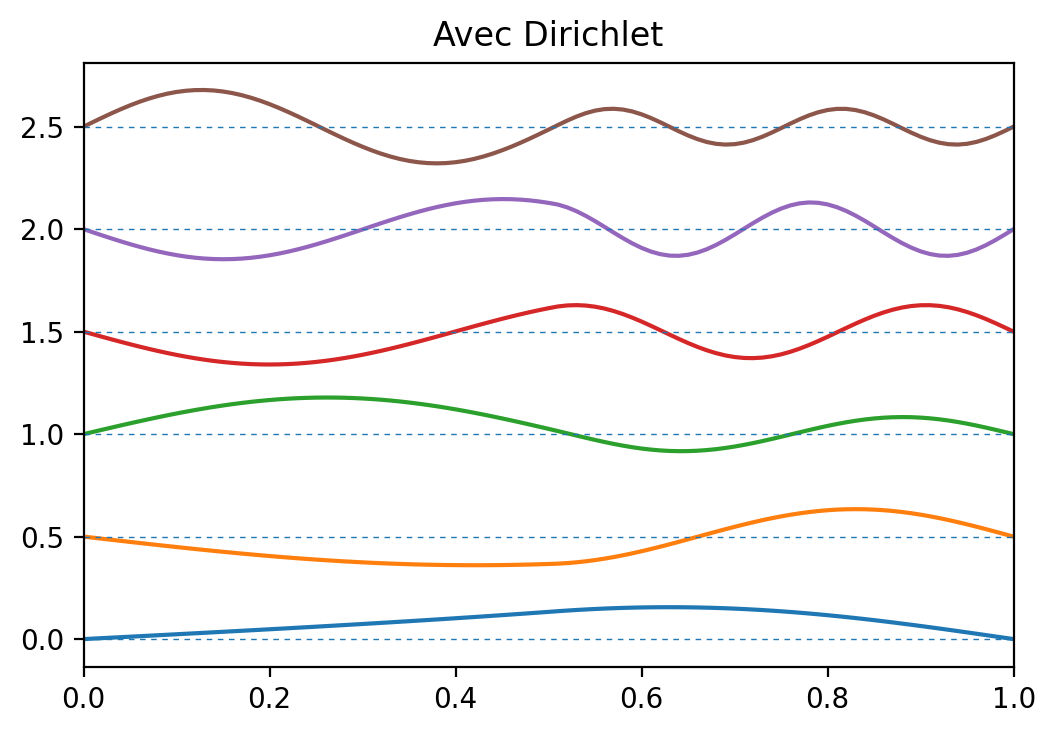

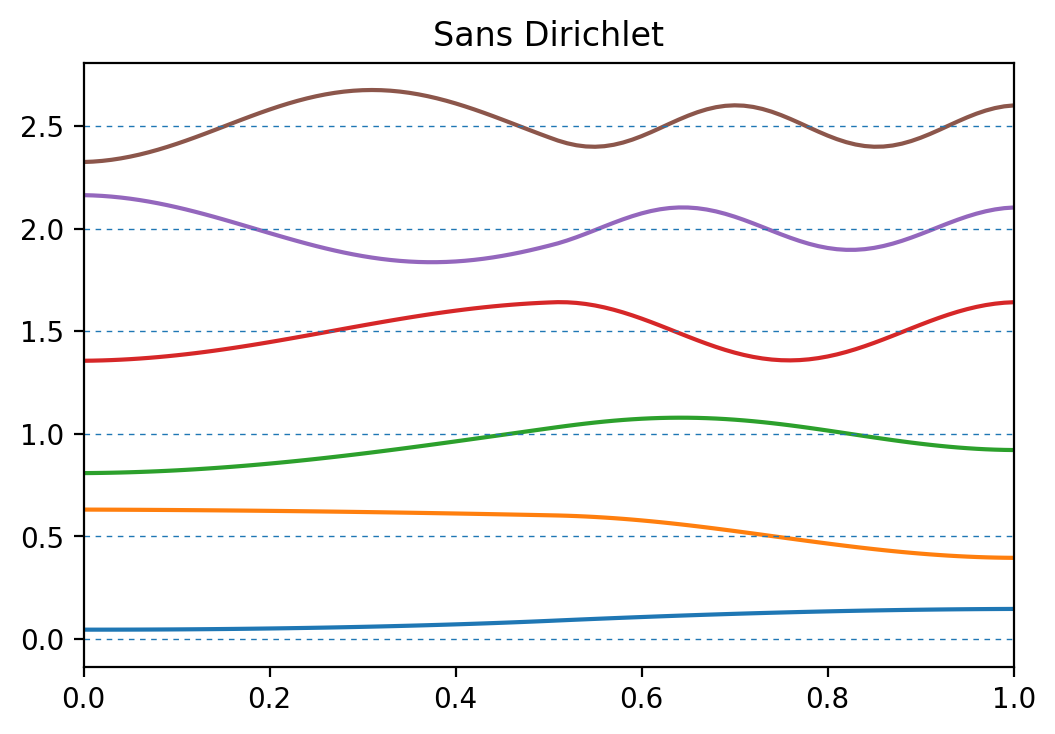

In [4]:
# Avec Dirichelet
modes(True)

# Sans Dirichelet
modes(False)

## Observations


On remarque que la longueur d'onde diminue lorsque l'onde passe d'un milieu à un autre. On peut expliquer ceci par le fait que la vitesse de l'onde diminue vu que les billes de droite on une plus grande masse et sont donc plus lentement accélérées. La fréquence d'oscillation d'un mode devant demeurer constante et en remarquant $v = f\lambda$, on déduit que la longeur d'onde doit aussi diminuer dans la section plus lourde de la chaine.